In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
opsdb = db.OpsimDatabase('minion_1016_sqlite.db')
outDir = 'blah'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.OpsimFieldSlicer()
metricList = []
metricList.append(metrics.CountMetric(col='expMJD'))
bundleList = []
for metric in metricList:
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

In [6]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint night < 1095
Found 740920 visits
Running:  ['opsim_Count_expMJD_night_lt_1095_OPSI']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:91: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


1

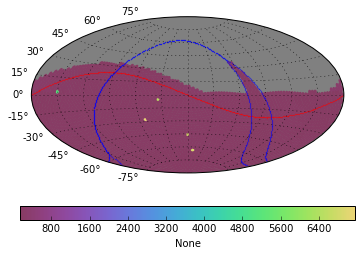

In [10]:
plotter = plots.BaseSkyMap()
plotter(bundleList[0].metricValues, slicer, {})

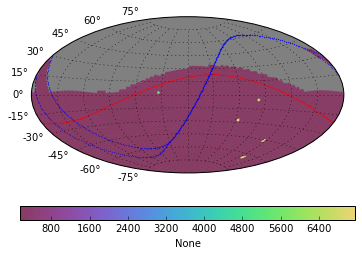

In [18]:
plotter = plots.BaseSkyMap()
fig_num = plotter(bundleList[0].metricValues, slicer, {'raCen':90})